# Create catalog from Zarr data

In [1]:
import intake

In [2]:
source = intake.open_zarr('/home/jovyan/work/output/TCCON data from Karlsruhe/test.zarr', decode_times=False)

In [3]:
source.discover()

{'dtype': None,
 'shape': None,
 'npartitions': None,
 'metadata': {'dims': {'time': 57377,
   'ak_P_hPa': 71,
   'ak_zenith': 16,
   'prior_date': 1223,
   'prior_Height': 71},
  'data_vars': {'GFIT_Version': ['time'],
   'GSETUP_Version': ['time'],
   'ak_ch4': ['ak_P_hPa', 'ak_zenith'],
   'ak_co': ['ak_P_hPa', 'ak_zenith'],
   'ak_co2': ['ak_P_hPa', 'ak_zenith'],
   'ak_h2o': ['ak_P_hPa', 'ak_zenith'],
   'ak_hdo': ['ak_P_hPa', 'ak_zenith'],
   'ak_hf': ['ak_P_hPa', 'ak_zenith'],
   'ak_n2o': ['ak_P_hPa', 'ak_zenith'],
   'asza_deg': ['time'],
   'azim_deg': ['time'],
   'day': ['time'],
   'fvsi': ['time'],
   'hour': ['time'],
   'hout_RH': ['time'],
   'lat_deg': ['time'],
   'long_deg': ['time'],
   'pout_hPa': ['time'],
   'prior_Density': ['prior_Height', 'prior_date'],
   'prior_Pressure': ['prior_Height', 'prior_date'],
   'prior_Temp': ['prior_Height', 'prior_date'],
   'prior_ch4': ['prior_Height', 'prior_date'],
   'prior_co': ['prior_Height', 'prior_date'],
   'prior_co

In [4]:
df = source.read_chunked()
df

<xarray.Dataset>
Dimensions:           (time: 57377, ak_P_hPa: 71, ak_zenith: 16,
                       prior_date: 1223, prior_Height: 71)
Coordinates:
  * ak_P_hPa          (ak_P_hPa) float64 1.008e+03 900.9 803.1 ... 0.07 0.06
  * ak_zenith         (ak_zenith) float64 10.0 15.0 20.0 25.0 ... 75.0 80.0 85.0
  * prior_Height      (prior_Height) float64 0.0 1.0 2.0 3.0 ... 68.0 69.0 70.0
  * prior_date        (prior_date) float64 1.472e+04 1.472e+04 ... 1.86e+04
  * time              (time) float64 1.472e+04 1.472e+04 ... 1.86e+04 1.86e+04
Data variables: (12/54)
    GFIT_Version      (time) object dask.array<chunksize=(57377,), meta=np.ndarray>
    GSETUP_Version    (time) object dask.array<chunksize=(57377,), meta=np.ndarray>
    ak_ch4            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_co             (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_co2            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_h2o            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ...                ...
    xhf_ppt_error     (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
    xn2o_ppb          (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
    xn2o_ppb_error    (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
    year              (time) float64 dask.array<chunksize=(57377,), meta=np.ndarray>
    zmin_km           (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
    zobs_km           (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
Attributes: (12/15)
    Auxiliary_Data_Description:  https://tccon-wiki.caltech.edu/Network_Polic...
    Contact:                     Frank Hase <frank.hase@kit.edu>
    Data_DOI:                    10.14291/tccon.ggg2014.karlsruhe01.R1/1182416
    Data_Reference:              Hase, F., T. Blumenstock, S. Dohe, J. Gro�, ...
    Data_Revision:               R1
    Data_Use_Policy:             https://tccon-wiki.caltech.edu/Network_Polic...
    ...                          ...
    TCCON_Reference:             Wunch, D., G. C. Toon, J.-F. L. Blavier, R. ...
    creation_date:               2022/01/01
    end_date:                    2020/11/30
    id:                          ka
    longName:                    karlsruhe01
    start_date:                  2010/04/19

In [5]:
print(source.yaml())

sources:
  zarr:
    args:
      decode_times: false
      urlpath: /home/jovyan/work/output/TCCON data from Karlsruhe/test.zarr
    description: ''
    driver: intake_xarray.xzarr.ZarrSource
    metadata:
      Auxiliary_Data_Description: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy/Auxiliary_Data
      Contact: Frank Hase <frank.hase@kit.edu>
      Data_DOI: 10.14291/tccon.ggg2014.karlsruhe01.R1/1182416
      Data_Reference: "Hase, F., T. Blumenstock, S. Dohe, J. Gro\uFFFD, M. Kiel. 2015.\
        \ TCCON data from Karlsruhe, Germany, Release GGG2014R1. TCCON data archive,\
        \ hosted by CaltechDATA, California Institute of Technology, Pasadena, CA,\
        \ U.S.A. https://doi.org/10.14291/tccon.ggg2014.karlsruhe01.R1/1182416"
      Data_Revision: R1
      Data_Use_Policy: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy
      Location: Karlsruhe, Germany
      More_Information: https://tccon-wiki.caltech.edu
      Software_Version: GGG2014
     

In [6]:
import os
os.getcwd()

'/home/jovyan/work/jupyter'

In [7]:
with open('../intake-catalogs/tccon.yaml', 'w') as f:
    f.write(source.yaml())

# Use catalog to read Zarr data

In [8]:
intake.gui.add('../intake-catalogs/tccon.yaml')

Column(width_policy='max')
    [0] Row(width_policy='max')
        [0] PNG(str)
        [1] Column(width_policy='max')
            [0] Column(name='Select Catalog')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, options={'builtin': <Intake catalo...}, size=9, value=[<Intake catalog: tccon>], width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(name='＋', width=50)
                [1] Button(name='―', width=50)
                [2] Toggle(name='🔍', width=50)
        [2] Column(width_policy='max')
            [0] Column(name='Select Data Source')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, options=OrderedDict([('zarr', ...]), size=9, value=[name: zarr
container: xar...], width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(name='📊', width=50)
                [1] Toggle(disabled=True, name='⚙', width=50)
        [3] Column(height=240, name='Description', scroll=True, sizing_mode='stretch_width', width_policy='max')
            [0] Markdown(str)
    [1] Row(width_policy='max')
        [0] Row(height_policy='min', max_width=5000, name='Search', width_policy='max')
        [1] Column(max_width=5000, name='Add Catalog', width_policy='max')
        [2] Column(name='Plot', width_policy='max')
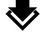

In [9]:
intake.gui

In [10]:
intake.gui.item()

zarr:
  args:
    decode_times: false
    urlpath: /home/jovyan/work/output/TCCON data from Karlsruhe/test.zarr
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    Auxiliary_Data_Description: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy/Auxiliary_Data
    Contact: Frank Hase <frank.hase@kit.edu>
    Data_DOI: 10.14291/tccon.ggg2014.karlsruhe01.R1/1182416
    Data_Reference: "Hase, F., T. Blumenstock, S. Dohe, J. Gro\uFFFD, M. Kiel. 2015.\
      \ TCCON data from Karlsruhe, Germany, Release GGG2014R1. TCCON data archive,\
      \ hosted by CaltechDATA, California Institute of Technology, Pasadena, CA, U.S.A.\
      \ https://doi.org/10.14291/tccon.ggg2014.karlsruhe01.R1/1182416"
    Data_Revision: R1
    Data_Use_Policy: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy
    Location: Karlsruhe, Germany
    More_Information: https://tccon-wiki.caltech.edu
    Software_Version: GGG2014
    TCCON_Reference: 'Wunch, D., G. C. Toon, J.-F. L

In [11]:
intake.gui.item().read_chunked()

<xarray.Dataset>
Dimensions:           (time: 57377, ak_P_hPa: 71, ak_zenith: 16,
                       prior_date: 1223, prior_Height: 71)
Coordinates:
  * ak_P_hPa          (ak_P_hPa) float64 1.008e+03 900.9 803.1 ... 0.07 0.06
  * ak_zenith         (ak_zenith) float64 10.0 15.0 20.0 25.0 ... 75.0 80.0 85.0
  * prior_Height      (prior_Height) float64 0.0 1.0 2.0 3.0 ... 68.0 69.0 70.0
  * prior_date        (prior_date) float64 1.472e+04 1.472e+04 ... 1.86e+04
  * time              (time) float64 1.472e+04 1.472e+04 ... 1.86e+04 1.86e+04
Data variables: (12/54)
    GFIT_Version      (time) object dask.array<chunksize=(57377,), meta=np.ndarray>
    GSETUP_Version    (time) object dask.array<chunksize=(57377,), meta=np.ndarray>
    ak_ch4            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_co             (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_co2            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_h2o            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ...                ...
    xhf_ppt_error     (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
    xn2o_ppb          (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
    xn2o_ppb_error    (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
    year              (time) float64 dask.array<chunksize=(57377,), meta=np.ndarray>
    zmin_km           (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
    zobs_km           (time) float32 dask.array<chunksize=(57377,), meta=np.ndarray>
Attributes: (12/15)
    Auxiliary_Data_Description:  https://tccon-wiki.caltech.edu/Network_Polic...
    Contact:                     Frank Hase <frank.hase@kit.edu>
    Data_DOI:                    10.14291/tccon.ggg2014.karlsruhe01.R1/1182416
    Data_Reference:              Hase, F., T. Blumenstock, S. Dohe, J. Gro�, ...
    Data_Revision:               R1
    Data_Use_Policy:             https://tccon-wiki.caltech.edu/Network_Polic...
    ...                          ...
    TCCON_Reference:             Wunch, D., G. C. Toon, J.-F. L. Blavier, R. ...
    creation_date:               2022/01/01
    end_date:                    2020/11/30
    id:                          ka
    longName:                    karlsruhe01
    start_date:                  2010/04/19

# Read data from JSON meta data

## Working Example without Intake

This is taken from the blog post: https://medium.com/pangeo/fake-it-until-you-make-it-reading-goes-netcdf4-data-on-aws-s3-as-zarr-for-rapid-data-access-61e33f8fe685

In [17]:
import fsspec
import xarray as xr

fs = fsspec.filesystem(
    "reference", 
    fo="/home/jovyan/work/output/s3/combine.json", 
    remote_protocol="file",
    skip_instance_cache=True
)
m = fs.get_mapper("")

ds_without_intake = xr.open_dataset(m, engine='zarr', consolidated=False)

In [18]:
ds_without_intake

<xarray.Dataset>
Dimensions:                                                 (t: 24, y: 5424,
                                                             x: 5424,
                                                             SST_day_night_emissive_bands: 4,
                                                             SST_night_only_emissive_band: 1,
                                                             number_of_SZA_bounds: 2,
                                                             number_of_LZA_bounds: 2,
                                                             number_of_time_bounds: 2,
                                                             number_of_image_bounds: 2)
Coordinates: (12/14)
    SST_day_night_emissive_band_ids                         (t, SST_day_night_emissive_bands) float32 ...
    SST_day_night_emissive_wavelengths                      (t, SST_day_night_emissive_bands) float32 ...
    SST_night_only_emissive_band_id                         (t, SST_night_only_emissive_band) float32 ...
    SST_night_only_emissive_wavelength                      (t, SST_night_only_emissive_band) float32 ...
    day_solar_zenith_angle                                  (t) float32 ...
    night_solar_zenith_angle                                (t) float32 ...
    ...                                                      ...
    retrieval_solar_zenith_angle                            (t) float32 ...
  * t                                                       (t) datetime64[ns] ...
  * x                                                       (x) float32 -0.15...
    x_image                                                 (t) float32 ...
  * y                                                       (y) float32 0.151...
    y_image                                                 (t) float32 ...
Dimensions without coordinates: SST_day_night_emissive_bands,
                                SST_night_only_emissive_band,
                                number_of_SZA_bounds, number_of_LZA_bounds,
                                number_of_time_bounds, number_of_image_bounds
Data variables: (12/42)
    DQF                                                     (t, y, x) float32 ...
    SST                                                     (t, y, x) float32 ...
    algorithm_dynamic_input_data_container                  (t) float64 ...
    algorithm_product_version_container                     (t) float64 ...
    day_solar_zenith_angle_bounds                           (t, number_of_SZA_bounds) float32 ...
    geospatial_lat_lon_extent                               (t) float32 ...
    ...                                                      ...
    total_number_of_severely_degraded_quality_ocean_pixels  (t) float64 ...
    total_number_of_unprocessed_pixels                      (t) float64 ...
    twilight_solar_zenith_angle                             (t) float32 ...
    twilight_solar_zenith_angle_bounds                      (t, number_of_SZA_bounds) float32 ...
    x_image_bounds                                          (t, number_of_image_bounds) float32 ...
    y_image_bounds                                          (t, number_of_image_bounds) float32 ...
Attributes: (12/34)
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    _FillValue:                -999.0
    cdm_data_type:             Image
    cell_methods:              quantitative_local_zenith_angle: sum retrieval...
    dataset_name:              OR_ABI-L2-SSTF-M6_G16_s20202100000205_e2020210...
    ...                        ...
    summary:                   The ABI Sea Surface Temperature (SST) is calcu...
    time_coverage_end:         2020-07-28T00:59:51.3Z
    time_coverage_start:       2020-07-28T00:00:20.5Z
    timeline_id:               ABI Mode 6
    title:                     ABI L2 Sea Surface (Skin) Temperature
    units:                     K

## JSON metadata with Intake

Next we try to do the same with the Intake xarray plugin: https://intake-xarray.readthedocs.io/en/latest/

### intake.open_netcdf(...)

Trying to use `intake.open_netcdf` we get the following error:

In [51]:
# This is the source for intake.open_netcdf: https://github.com/intake/intake-xarray/blob/master/intake_xarray/netcdf.py
json_source = intake.open_netcdf('/home/jovyan/work/output/s3/combine.json', xarray_kwargs={'engine': 'zarr', 'consolidated': False})

In [52]:
json_source.discover()

FSPathExistNotDir: path exists but is not a directory: %r

### intake.open_zarr(...)

The `intake.open_zarr` works when an `FSMap` is used. It does not work with a path string.

In [62]:
# It works when the FSMap is used.
json_source = intake.open_zarr(m, engine='zarr')
json_source.discover()

{'dtype': None,
 'shape': None,
 'npartitions': None,
 'metadata': {'dims': {'t': 24,
   'y': 5424,
   'x': 5424,
   'SST_day_night_emissive_bands': 4,
   'SST_night_only_emissive_band': 1,
   'number_of_SZA_bounds': 2,
   'number_of_LZA_bounds': 2,
   'number_of_time_bounds': 2,
   'number_of_image_bounds': 2},
  'data_vars': {'DQF': ['day_solar_zenith_angle',
    'night_solar_zenith_angle',
    'quantitative_local_zenith_angle',
    'retrieval_local_zenith_angle',
    'retrieval_solar_zenith_angle',
    't',
    'x',
    'x_image',
    'y',
    'y_image'],
   'SST': ['day_solar_zenith_angle',
    'night_solar_zenith_angle',
    'quantitative_local_zenith_angle',
    'retrieval_local_zenith_angle',
    'retrieval_solar_zenith_angle',
    't',
    'x',
    'x_image',
    'y',
    'y_image'],
   'algorithm_dynamic_input_data_container': ['day_solar_zenith_angle',
    'night_solar_zenith_angle',
    'quantitative_local_zenith_angle',
    'retrieval_local_zenith_angle',
    'retrieval_sol

In [64]:
# It does not work when a path string is used.
json_source = intake.open_zarr('/home/jovyan/work/output/s3/combine.json', consolidated=False)
json_source.discover()

FSPathExistNotDir: path exists but is not a directory: %r

In the end we want to execute:

```python
fs = fsspec.filesystem(
    "reference", 
    fo="/home/jovyan/work/output/s3/combine.json", 
    remote_protocol="file",
    skip_instance_cache=True
)
m = fs.get_mapper("")

ds_without_intake = xr.open_dataset(m, engine='zarr', consolidated=False)
```

The `open_netcdf` runs according to https://github.com/intake/intake-xarray/blob/d31d1fa8022bb489b0c5d4e29b5928fbd02f02b1/intake_xarray/netcdf.py#L92:

```python
self._ds = _open_dataset(url, chunks=self.chunks, **kwargs)
```

1. `_open_dataset` is a reference on `xr.open_dataset`, so that is fine.
2. `self.chunks` is `None` in our case and can be ignored.
3. We can pass anything in the `xarray_kwargs` like `engine='zarr'`, so that shouldn't make any problems as well.

Thus, the issue here is the first parameter. The JSON metadata approach only works for the `fsspec` map. Let's see if this is true.

In [30]:
type(m)

fsspec.mapping.FSMap

### Approach with mapper vs. without mapper

In [48]:
fs = fsspec.filesystem(
    "reference", 
    fo="/home/jovyan/work/output/s3/combine.json", 
    remote_protocol="file",
    skip_instance_cache=True
)
m = fs.get_mapper("")

# This works with FSMap
ds_with_mapper = xr.open_dataset(m, engine='zarr', consolidated=False)

In [49]:
# A local file reference does not work
ds_without_mapper = xr.open_dataset('/home/jovyan/work/output/s3/combine.json', engine='zarr', consolidated=False)

FSPathExistNotDir: path exists but is not a directory: %r

As guessed, it needs `fsspec` to work. It doesn't make any sense to pass the mapper instead of the string to Intake. If we would do that, the user would have to do half the work manually and that is exactly what we try to avoid with Intake.

From here on we can do two things:

1. Modify the xarray plugin to support the JSON workflow.
2. Looking for the difference in `xr.open_dataset` when a `FSMap` is used instead of a string.

### Modifying the xarray plugin

According to https://github.com/intake/intake-xarray/blob/d31d1fa8022bb489b0c5d4e29b5928fbd02f02b1/setup.py fsspec is already a dependency of the xarray plugin.

In [47]:
fs1 = fsspec.filesystem(
    "reference", 
    fo="/home/jovyan/work/output/s3/combine.json", 
    remote_protocol="file",
    skip_instance_cache=True
)

fs2 = fsspec.open("/home/jovyan/work/output/s3/combine.json")
fs3 = fsspec.open_local("/home/jovyan/work/output/s3/combine.json")

# In the blog post an FSMap is used
print(type(m))

# fsspec.filesystem returns a ReferenceFileSystem
print(type(fs1))

# fsspec.open returns an OpenFile
print(type(fs2))

# fsspec.open_local returns a string
print(str(type(fs3)) + " " + fs3)

<class 'fsspec.mapping.FSMap'>
<class 'fsspec.implementations.reference.ReferenceFileSystem'>
<class 'fsspec.core.OpenFile'>
<class 'str'> /home/jovyan/work/output/s3/combine.json


### What is happening in xr.open_dataset?

Here is a link to the method source: https://github.com/pydata/xarray/blob/main/xarray/backends/api.py#L368



GitHub Issues:

- https://github.com/intake/intake-xarray/issues/70 This is an issue from 2020 where intake-array used the fsspec.mapper. Sounds like they removed it back then.